<a href="https://colab.research.google.com/github/DrsimpleMugo/Brain-Tumor-Classification/blob/main/Tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **BRAIN TUMOR CLASSIFICATION**









In [ ]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
data_dir ="/content/drive/MyDrive/Tumor detection"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['glioma','meningioma','No_tumor', 'pituitary'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['glioma' 'meningioma' 'No_tumor' 'pituitary']


In [ ]:
train_path = '/content/drive/MyDrive/Tumor detection/Training'
test_path = '/content/drive/MyDrive/Tumor detection/Testing'

In [ ]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

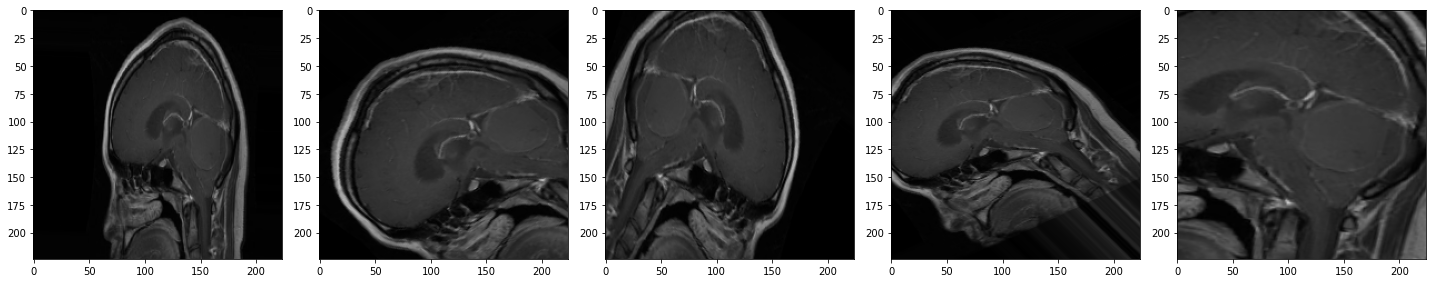

In [ ]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

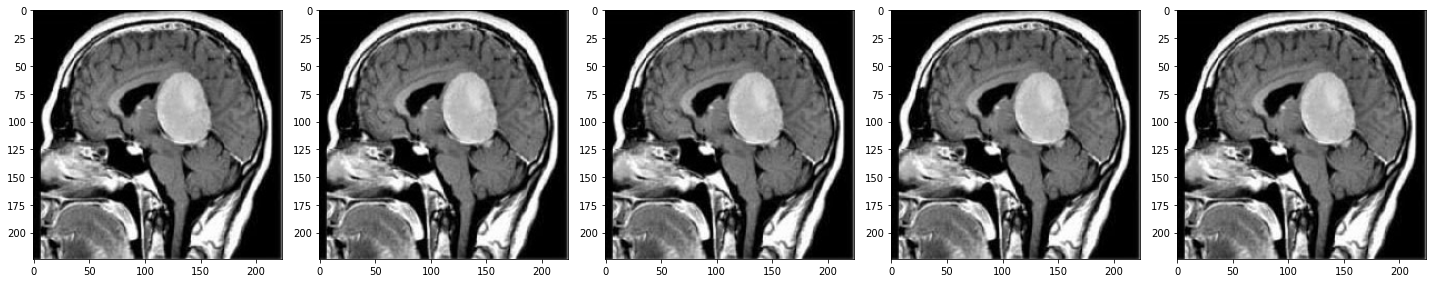

In [ ]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [ ]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (4,4), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (4,4), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (4,4), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 221, 221, 16)      784       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 107, 107, 32)      8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)            

In [ ]:
EPOCHS=20
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
90/90 [==============================] - 1382s 15s/step - loss: 1.3540 - accuracy: 0.3561 - val_loss: 1.5332 - val_accuracy: 0.2056
Epoch 2/20
90/90 [==============================] - 144s 2s/step - loss: 1.1633 - accuracy: 0.4474 - val_loss: 1.9010 - val_accuracy: 0.3198
Epoch 3/20
90/90 [==============================] - 143s 2s/step - loss: 1.0568 - accuracy: 0.5247 - val_loss: 1.8917 - val_accuracy: 0.3173
Epoch 4/20
90/90 [==============================] - 143s 2s/step - loss: 1.0061 - accuracy: 0.5659 - val_loss: 2.2369 - val_accuracy: 0.2944
Epoch 5/20
90/90 [==============================] - 143s 2s/step - loss: 0.9598 - accuracy: 0.5805 - val_loss: 2.1277 - val_accuracy: 0.3629
Epoch 6/20
90/90 [==============================] - 143s 2s/step - loss: 0.9320 - accuracy: 0.5909 - val_loss: 2.2962 - val_accuracy: 0.3883
Epoch 7/20
90/90 [==============================] - 142s 2s/step - loss: 0.9001 - accuracy: 0.6171 - val_loss: 2.7576 - val_accuracy: 0.2995
Epoch 8/20


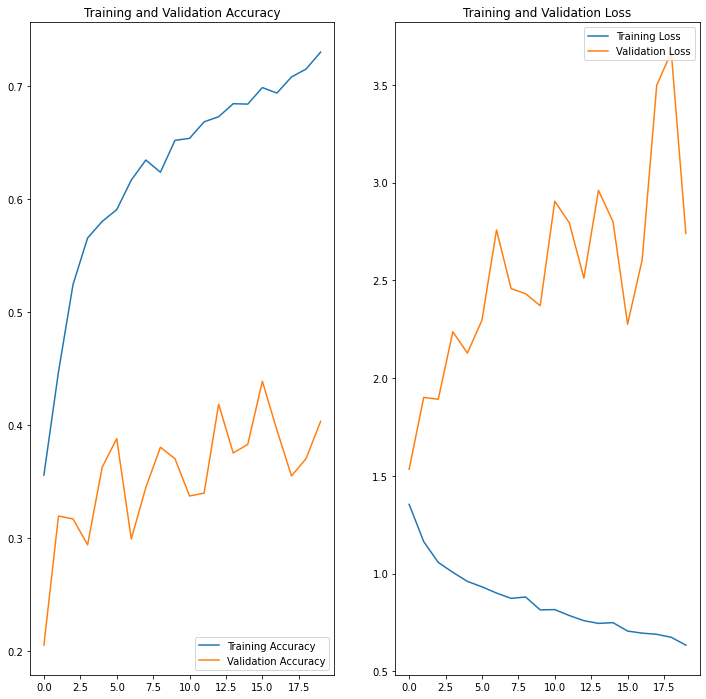

In [ ]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Tumor detection/Tumor.h5')

In [ ]:
model =load_model('/content/drive/MyDrive/Tumor detection/Tumor.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Tumor detection/Testing/pituitary_tumor/image(30).jpg',target_size=(224,224))

In [ ]:
x = image.img_to_array(img)

x

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [2., 2., 2.],
        [1., 1., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.]],

       [[2., 2., 2.],
        [3., 3., 3.],
        [2., 2., 2.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/255

In [ ]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input
x=np.expand_dims(x, axis = 0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
prediction = model.predict(img_data)

prediction

array([[0., 0., 1., 0.]], dtype=float32)

In [ ]:
class_img = np.argmax(prediction, axis = 1)

class_img

array([2])